In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import time
np.random.seed(0)

# Dataset loading
dataset = pd.read_csv('banana_quality.csv')
print("Unique values in 'Quality' before encoding:", dataset['Quality'].unique())

# Convert categorical response variable 'Quality' to a binary numeric feature (0 and 1)
label_encoder = LabelEncoder()
dataset['Quality'] = label_encoder.fit_transform(dataset['Quality'])
dataset.head()

Unique values in 'Quality' before encoding: ['Good' 'Bad']


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


In [3]:
# Cleaning the dataset from outliers
print("Old Shape: ", dataset.shape)

Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
# Removing the outliers
upper_array = np.where(dataset >= upper)[0]
dataset.drop(index=upper_array, inplace=True)

lower_array = np.where(dataset <= lower)[0]
dataset.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", dataset.shape)
print(dataset.head())


Old Shape:  (8000, 8)
New Shape:  (7645, 8)
       Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290   
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325   
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322   
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862   
4  0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345  2.812442   

   Quality  
0        1  
1        1  
2        1  
3        1  
4        1  


In [4]:
import numpy as np
import time

# Sigmoid function to compute probabilities
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Standardize the original data points (mean 0 and std dev 1)
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

# Build matrices X (design matrix) and y (target values)
def build_model_data(features, target):
    num_samples = len(target)
    X = np.c_[np.ones(num_samples), features]  # Adding bias term (column of 1's)
    return X, target

# Logistic gradient as derived in your formula
def compute_logistic_gradient(X, theta, y):
    z = X.dot(theta)
    pi = sigmoid(z)  # Predicted probabilities using the sigmoid function
    grad = -X.T.dot(y - pi)  # Gradient of the log-likelihood
    return grad

# Objective function to compute the logistic loss => I want to minimize
def calculate_logistic_objective(X, y, theta):
    z = X.dot(theta)
    pi = sigmoid(z)
    obj = - np.sum(y * np.log(pi + 1e-9) + (1 - y) * np.log(1 - pi + 1e-9))
    return obj

# Prepare the features and target
features = dataset[['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', 'Acidity']].values
target = dataset['Quality'].values  # Assuming 'Quality' is already binary (0/1)
features_std = np.apply_along_axis(standardize, 0, features)  # Standardize all features
X, y = build_model_data(features_std, target)  # Prepare the design matrix X and target vector y

print(f'X: {X.shape}, y: {y.shape}')

X: (7645, 8), y: (7645,)


In [ ]:
dataset.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


In [5]:
# Initialize parameters
initial_theta = np.random.randn(X.shape[1])                 # Initial guess for theta (size of number of features + bias)
max_iters = 20000                                           # Maximum number of iterations
gamma = 0.0001                                              # Learning rate
tolerance = 1e-6                                            # Tolerance for stopping condition
m_steps = 400                                               # Number of steps for batch evaluation

Convergence reached at iteration 407. Stopping early.
Total execution time: 0.3208 seconds
Total number of steps: 406
Final theta (parameters): [-0.27564298  1.40027727  1.98760982  1.37282103  0.17574762  1.11496834
  1.2975772  -0.2378083 ]


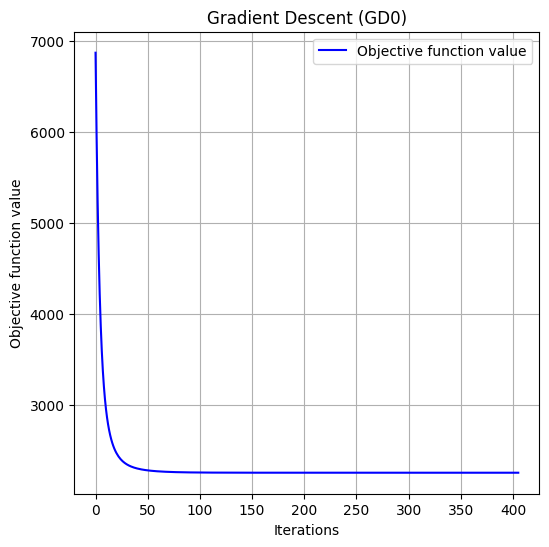

In [6]:
"Gradient descent (GD0) - Termination condition"

# Gradient descent algorithm with a termination condition based on objective function
def gradient_descent_logistic(X, initial_theta, y, max_iters, gamma, tolerance=1e-6):
    start_time = time.time()
    theta = initial_theta
    objectives = []
    num_steps = 0

    # Calculate initial objective
    current_obj = calculate_logistic_objective(X, y, theta)

    for n_iter in range(max_iters):
        grad = compute_logistic_gradient(X, theta, y)

        # Update theta based on gradient descent step
        new_theta = theta - gamma * grad

        # Calculate new objective
        new_obj = calculate_logistic_objective(X, y, new_theta)

        # Check for convergence based on objective function
        if abs(new_obj - current_obj) <= tolerance:
            print(f"Convergence reached at iteration {n_iter+1}. Stopping early.")
            break

        # Update parameters
        theta = new_theta
        current_obj = new_obj
        objectives.append(current_obj)
        num_steps += 1

    total_time = time.time() - start_time
    print(f"Total execution time: {total_time:.4f} seconds")
    print(f"Total number of steps: {num_steps}")

    return objectives, theta


# Run gradient descent
objectives, final_theta = gradient_descent_logistic(X, initial_theta, y, max_iters, gamma, tolerance)

# Output the final results
print(f"Final theta (parameters): {final_theta}")

# Print objective function values
# for i in range(len(objectives)):
#    print(f"Objective function value at iteration {i+1}: {objectives[i]}")

# Plotting the objective function values
plt.figure(figsize=(6, 6))
plt.plot(objectives, label='Objective function value', color='blue')
plt.title('Gradient Descent (GD0)')
plt.xlabel('Iterations')
plt.ylabel('Objective function value')
plt.grid()
plt.legend()
plt.show()

Convergence reached at iteration 24. Stopping early.
Total execution time: 0.2211 seconds
Total number of steps: 23
Final theta (parameters): [-0.27601812  1.4015398   1.98985191  1.37380159  0.17602658  1.11529926
  1.29890231 -0.2378142 ]


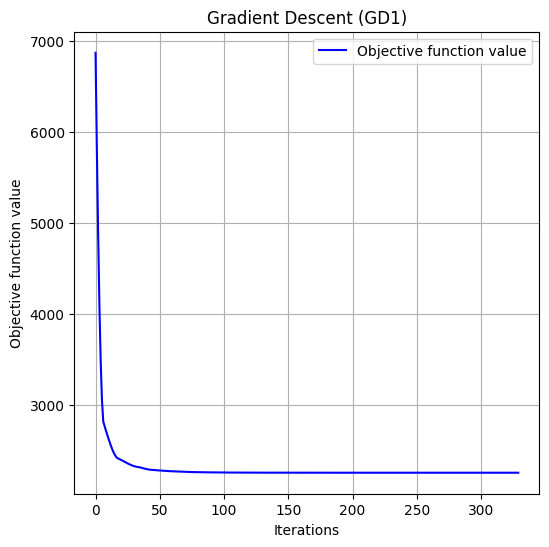

In [7]:
"Gradient descent (GD1) - Bold Driver algorithm"

# Bold Driver Gradient Descent Algorithm for Logistic Regression
def gradient_descent_logistic_bold_driver(X, initial_theta, y, max_iters, initial_gamma, tolerance=1e-6, m_steps=10):
    start_time = time.time()
    theta = initial_theta
    objectives = []
    gamma = initial_gamma
    step_memory = []  # To store successful steps
    num_steps = 0

    # Calculate the initial objective
    current_obj = calculate_logistic_objective(X, y, theta)

    for n_iter in range(max_iters):
        # Compute the gradient
        grad = compute_logistic_gradient(X, theta, y)

        # Perform m steps with the current learning rate
        for step in range(m_steps):
            # Update theta using gradient descent step
            new_theta = theta - gamma * grad

            # Calculate new objective
            new_obj = calculate_logistic_objective(X, y, new_theta)

            # Check if the objective improves
            if new_obj < current_obj:
                # If improvement, accept the new step
                theta = new_theta
                current_obj = new_obj
                objectives.append(current_obj)
                step_memory.append((theta, current_obj))  # Store successful step
                gamma *= 1.05  # Increase learning rate by 5%
            else:
                # If objective worsened, undo last m steps and reduce learning rate
                if len(step_memory) >= m_steps:
                    # Undo last m steps
                    theta, current_obj = step_memory[-m_steps]
                    step_memory = step_memory[:-m_steps]
                gamma *= 0.5  # Reduce learning rate by 50%
                break  # Exit the inner loop after undoing

        # Check for convergence based on the change in the objective function
        if abs(new_obj - current_obj) <= tolerance:
            print(f"Convergence reached at iteration {n_iter + 1}. Stopping early.")
            break

        num_steps += 1

    total_time = time.time() - start_time
    print(f"Total execution time: {total_time:.4f} seconds")
    print(f"Total number of steps: {num_steps}")

    return objectives, theta

# Run the Bold Driver algorithm with gradient descent for logistic regression
objectives, final_theta = gradient_descent_logistic_bold_driver(X, initial_theta, y, max_iters, gamma, tolerance, m_steps)

# Output the final results
print(f"Final theta (parameters): {final_theta}")

# Plotting the objective function values
plt.figure(figsize=(6, 6))
plt.plot(objectives, label='Objective function value', color='blue')
plt.title('Gradient Descent (GD1)')
plt.xlabel('Iterations')
plt.ylabel('Objective function value')
plt.grid()
plt.legend()
plt.show()

<ipython-input-4-bf2539dfd3e8>:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Convergence reached at iteration 47. Stopping early.
Total execution time: 0.8110 seconds
Total number of steps: 46
Final theta (parameters): [-0.27578211  1.40047287  1.98815776  1.37306669  0.17574131  1.1152237
  1.29781688 -0.23793821]


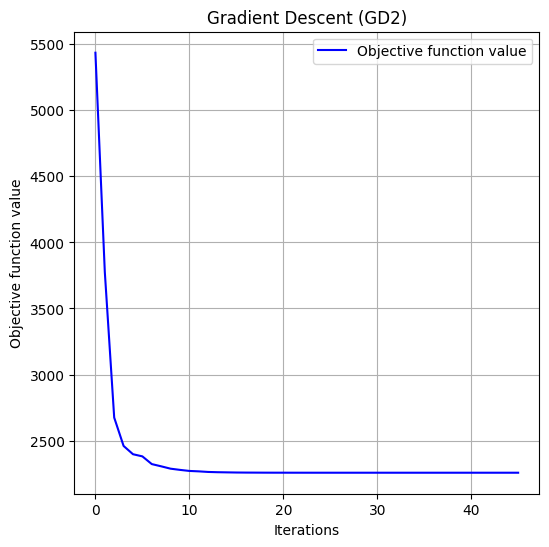

In [8]:
"Gradient descent (GD2) - Armijo Rule"

# Armijo rule for line search
def line_search(X, theta, grad, y, alpha=1.0, beta=0.5, mu=0.1):
    # Initial objective value
    current_obj = calculate_logistic_objective(X, y, theta)

    while True:
        new_theta = theta - alpha * grad
        new_obj = calculate_logistic_objective(X, y, new_theta)

        # Check if the Armijo condition is satisfied
        if new_obj <= current_obj - mu * alpha * np.dot(grad, grad):
            return new_theta, alpha  # Accept the step and return new theta and alpha

        # If not, reduce alpha
        alpha *= beta

        # Optional: Prevent alpha from going to zero
        if alpha < 1e-10:
            break

    return theta, 0  # Return original theta if no suitable alpha found

# Gradient descent algorithm with line search
def gradient_descent_logistic_line_search(X, initial_theta, y, max_iters, tolerance=1e-6):
    start_time = time.time()
    theta = initial_theta
    objectives = []
    num_steps = 0

    # Calculate initial objective
    current_obj = calculate_logistic_objective(X, y, theta)

    for n_iter in range(max_iters):
        grad = compute_logistic_gradient(X, theta, y)

        # Perform line search to find optimal step size
        new_theta, alpha = line_search(X, theta, grad, y)

        # Calculate new objective
        new_obj = calculate_logistic_objective(X, y, new_theta)

        # Check for convergence based on objective function
        if abs(new_obj - current_obj) <= tolerance or alpha == 0:
            print(f"Convergence reached at iteration {n_iter+1}. Stopping early.")
            break

        # Update parameters
        theta = new_theta
        current_obj = new_obj
        objectives.append(current_obj)
        num_steps += 1

    total_time = time.time() - start_time
    print(f"Total execution time: {total_time:.4f} seconds")
    print(f"Total number of steps: {num_steps}")

    return objectives, theta


# Run gradient descent with line search
objectives, final_theta = gradient_descent_logistic_line_search(X, initial_theta, y, max_iters, tolerance)

# Output the final results
print(f"Final theta (parameters): {final_theta}")

# Plotting the objective function values
plt.figure(figsize=(6, 6))
plt.plot(objectives, label='Objective function value', color='blue')
plt.title('Gradient Descent (GD2)')
plt.xlabel('Iterations')
plt.ylabel('Objective function value')
plt.grid()
plt.legend()
plt.show()


<ipython-input-4-bf2539dfd3e8>:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Convergence reached at iteration 37. Stopping early.
Total execution time: 0.9799 seconds
Total number of steps: 36
Final theta (parameters): [-0.27577821  1.40049114  1.98815829  1.3730631   0.17574867  1.11522256
  1.29783143 -0.23793977]


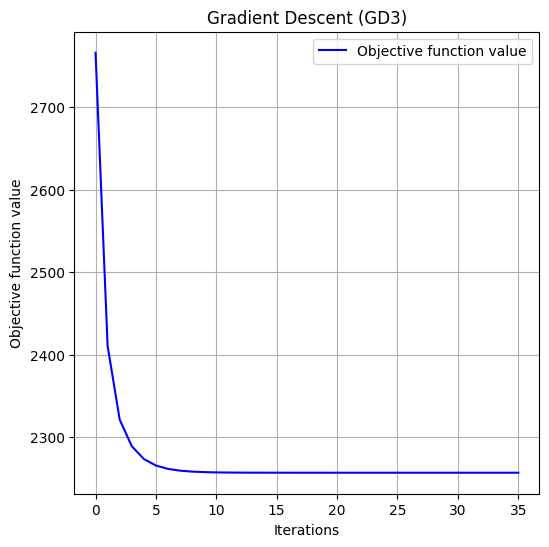

In [10]:
"Gradient descent (GD3) - Binary search"

def binary_search_line_search(X, theta, grad, y, alpha_max=1.0, epsilon=1e-6):
    a, b = 0, alpha_max  # Initialize the interval [a, b]

    while b - a > epsilon:  # Repeat until the interval is sufficiently small
        mid = (a + b) / 2

        # Evaluate the objective function at mid
        obj_mid = calculate_logistic_objective(X, y, theta - mid * grad)

        # Evaluate the objective function at mid + epsilon
        obj_mid_plus_epsilon = calculate_logistic_objective(X, y, theta - (mid + epsilon) * grad)

        # Debugging prints to track values
        # print(f"mid: {mid}, obj_mid: {obj_mid}, obj_mid_plus_epsilon: {obj_mid_plus_epsilon}")

        # Check if the function is increasing at mid
        if obj_mid_plus_epsilon < obj_mid:  # If decreasing, move the left bound up
            a = mid  # We are searching in [mid, b]
        else:  # If not decreasing, move the right bound down
            b = mid  # We are searching in [a, mid]

    # Final alpha as the average of the final interval
    alpha_optimal = (a + b) / 2
    new_theta = theta - alpha_optimal * grad
    return new_theta, alpha_optimal  # Return the updated theta and optimal alpha



# Gradient descent algorithm with binary search line search
def gradient_descent_logistic_line_search(X, initial_theta, y, max_iters, tolerance=1e-6):
    start_time = time.time()
    theta = initial_theta
    objectives = []
    num_steps = 0

    # Calculate initial objective
    current_obj = calculate_logistic_objective(X, y, theta)

    for n_iter in range(max_iters):
        grad = compute_logistic_gradient(X, theta, y)

        # Perform binary search line search to find optimal step size
        new_theta, alpha = binary_search_line_search(X, theta, grad, y, alpha_max=1.0)

        # Calculate new objective
        new_obj = calculate_logistic_objective(X, y, new_theta)

        # Check for convergence based on objective function
        if abs(new_obj - current_obj) <= tolerance:
            print(f"Convergence reached at iteration {n_iter + 1}. Stopping early.")
            break

        # Update parameters
        theta = new_theta
        current_obj = new_obj
        objectives.append(current_obj)
        num_steps += 1

    total_time = time.time() - start_time
    print(f"Total execution time: {total_time:.4f} seconds")
    print(f"Total number of steps: {num_steps}")

    return objectives, theta

# Run gradient descent with binary search line search
objectives, final_theta = gradient_descent_logistic_line_search(X, initial_theta, y, max_iters, tolerance)

# Output the final results
print(f"Final theta (parameters): {final_theta}")

# Plotting the objective function values
plt.figure(figsize=(6, 6))
plt.plot(objectives, label='Objective function value', color='blue')
plt.title('Gradient Descent (GD3)')
plt.xlabel('Iterations')
plt.ylabel('Objective function value')
plt.grid()
plt.legend()
plt.show()

Convergenza raggiunta all'iterazione 1
Tempo totale di esecuzione: 0.0031 secondi
Numero totale di passi: 2
Theta finale: [ 1.39860963  0.86183472  1.09297731  2.10769951  1.64485481 -0.46581033
  1.10910511 -0.15451177]


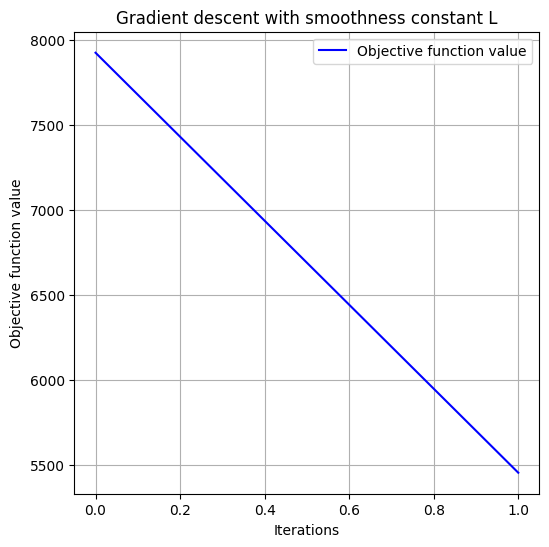

In [12]:
'Function for gradient descent with smoothness constant L'

def gradient_descent_with_smoothness(X, y, initial_theta, max_iters, L, tolerance=1e-6):
    start_time = time.time()
    theta = initial_theta
    objectives = []

    current_obj = calculate_logistic_objective(X, y, theta)
    objectives.append(current_obj)  # Store the initial objective value

    for n_iter in range(max_iters):
        grad = compute_logistic_gradient(X, theta, y)

        # Update theta
        gamma = 1 / L  # Step size based on the smoothness constant
        new_theta = theta - gamma * grad

        # Calculate new objective value
        new_obj = calculate_logistic_objective(X, y, new_theta)

        # Sufficient decrease condition
        sufficient_decrease = current_obj - (1 / (2 * L)) * np.linalg.norm(grad) ** 2

        # If new objective satisfies the sufficient decrease
        if new_obj <= sufficient_decrease:
            theta = new_theta
            current_obj = new_obj
            objectives.append(current_obj)  # Append the new objective value
        else:
            print(f"Non soddisfa la riduzione sufficiente all'iterazione {n_iter + 1}")
            break

        # Check for convergence
        if abs(new_obj - current_obj) <= tolerance:
            print(f"Convergenza raggiunta all'iterazione {n_iter + 1}")
            break

    total_time = time.time() - start_time
    print(f"Tempo totale di esecuzione: {total_time:.4f} secondi")
    print(f"Numero totale di passi: {len(objectives)}")

    return objectives, theta

# Calculate the smoothness constant L
def compute_smoothness_constant(X):
    eigenvalues = np.linalg.eigvals(X.T.dot(X))
    L = np.max(eigenvalues) / 4  # L = 1/4 * maximum eigenvalue
    return L


# Initialization other parameters
L = compute_smoothness_constant(X)                          # Calculate L from the dataset

# Execute gradient descent
objectives, final_theta = gradient_descent_with_smoothness(X, y, initial_theta, max_iters, L, tolerance)

# Final results
print(f"Theta finale: {final_theta}")

# Plotting the objective function values
plt.figure(figsize=(6, 6))
plt.plot(objectives, label='Objective function value', color='blue')
plt.title('Gradient descent with smoothness constant L')
plt.xlabel('Iterations')
plt.ylabel('Objective function value')
plt.grid()
plt.legend()
plt.show()

Convergence reached at iteration 11. Stopping early.
Total execution time: 0.0140 seconds
Total number of steps: 12
Final parameters (Theta): [ 1.75580417  0.4105034   0.98048295  2.23812323  1.86224417 -0.96740018
  0.95522918 -0.15164009]


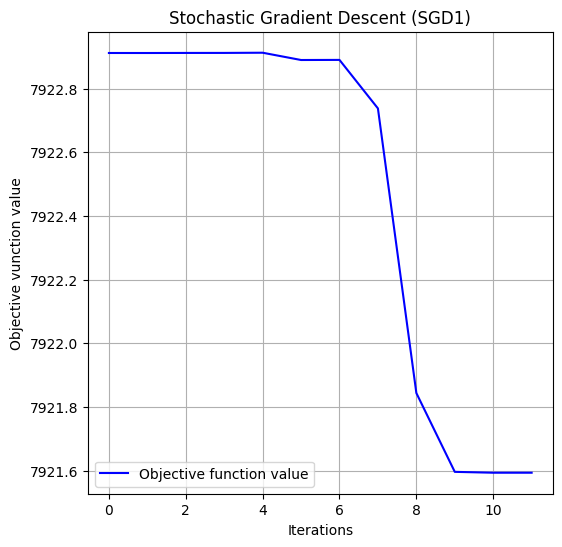

In [13]:
'Stochastic Gradient Descent for logistic regression'

def stochastic_gradient_descent_logistic(X, y, initial_theta, max_iters=1000, learning_rate=0.01, tolerance=1e-6):
    start_time = time.time()
    theta = initial_theta
    objectives = []

    # Calculate the initial objective
    current_obj = calculate_logistic_objective(X, y, theta)
    objectives.append(current_obj)

    for n_iter in range(max_iters):
        # Randomly select one index for the update
        random_index = np.random.randint(X.shape[0])  # Select a random observation

        # Select the current observation
        X_i = X[random_index:random_index + 1]
        y_i = y[random_index:random_index + 1]

        # Compute the gradient for the current observation
        grad = compute_logistic_gradient(X_i, theta, y_i)

        # Update theta using the gradient
        theta -= learning_rate * grad

        # Calculate the new objective
        new_obj = calculate_logistic_objective(X, y, theta)

        # Store the objective value
        objectives.append(new_obj)

        # Check for convergence based on the change in the objective function
        if abs(new_obj - current_obj) <= tolerance:
            print(f"Convergence reached at iteration {n_iter + 1}. Stopping early.")
            break

        # Update current objective
        current_obj = new_obj

    total_time = time.time() - start_time
    print(f"Total execution time: {total_time:.4f} seconds")
    print(f"Total number of steps: {len(objectives)}")
    return objectives, theta

# Execute Stochastic Gradient Descent for logistic regression
objectives, final_theta = stochastic_gradient_descent_logistic(X, y, initial_theta, max_iters, gamma, tolerance)

# Final results
print(f"Final parameters (Theta): {final_theta}")

# Plotting the objective function values
plt.figure(figsize=(6, 6))
plt.plot(objectives, label='Objective function value', color='blue')
plt.title('Stochastic Gradient Descent (SGD1)')
plt.xlabel('Iterations')
plt.ylabel('Objective vunction value')
plt.grid()
plt.legend()
plt.show()

Total execution time: 21.5054 seconds
Total number of steps: 20001
Final parameters (Theta): [-0.27913515  1.40956838  1.98673546  1.37841829  0.17503688  1.11055307
  1.30465497 -0.23549514]


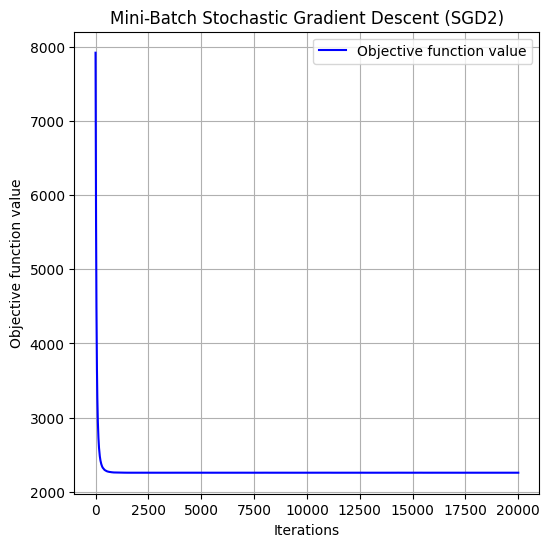

In [14]:
'Mini-Batch Stochastic Gradient Descent for logistic regression'

def mini_batch_stochastic_gradient_descent_logistic(X, y, initial_theta, batch_size=200, max_iters=1000, learning_rate=0.01, tolerance=1e-6):
    start_time = time.time()
    theta = initial_theta
    objectives = []

    # Calculate the initial objective
    current_obj = calculate_logistic_objective(X, y, theta)
    objectives.append(current_obj)

    for n_iter in range(max_iters):
        # Randomly select indices for the mini-batch
        indices = np.random.choice(X.shape[0], size=batch_size, replace=False)

        # Select the mini-batch
        X_batch = X[indices]
        y_batch = y[indices]

        # Compute the gradient for the mini-batch
        grad = compute_logistic_gradient(X_batch, theta, y_batch)

        # Update theta using the gradient
        theta -= learning_rate * grad

        # Calculate the new objective
        new_obj = calculate_logistic_objective(X, y, theta)

        # Store the objective value
        objectives.append(new_obj)

        # Check for convergence based on the change in the objective function
        if abs(new_obj - current_obj) <= tolerance:
            print(f"Convergence reached at iteration {n_iter + 1}. Stopping early.")
            break

        # Update current objective
        current_obj = new_obj

    total_time = time.time() - start_time
    print(f"Total execution time: {total_time:.4f} seconds")
    print(f"Total number of steps: {len(objectives)}")
    return objectives, theta


# Initialization of parameters
batch_size = 800                                        # Size of mini-batch

# Execute Mini-Batch Stochastic Gradient Descent for logistic regression
objectives, final_theta = mini_batch_stochastic_gradient_descent_logistic(X, y, initial_theta, batch_size, max_iters, gamma, tolerance)

# Final results
print(f"Final parameters (Theta): {final_theta}")

# Plotting the objective function values
plt.figure(figsize=(6, 6))
plt.plot(objectives, label='Objective function value', color='blue')
plt.title('Mini-Batch Stochastic Gradient Descent (SGD2)')
plt.xlabel('Iterations')
plt.ylabel('Objective function value')
plt.grid()
plt.legend()
plt.show()

Final theta: [-0.27576381  1.40046825  1.98809493  1.3730342   0.17574673  1.11520526
  1.29780287 -0.23793516]
Total steps executed: 19
Total execution time: 0.0199 seconds


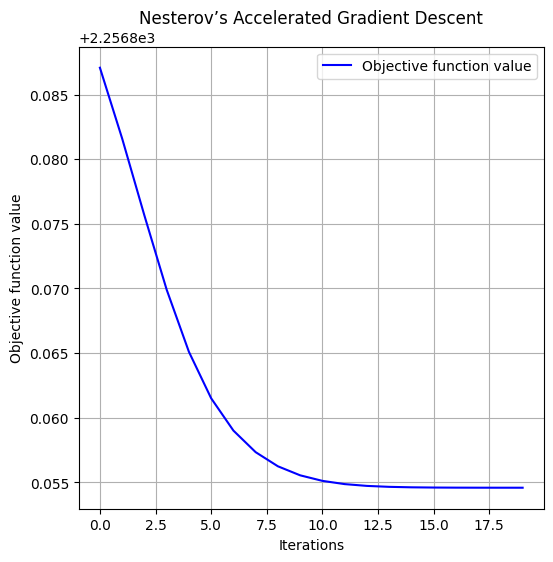

In [15]:
'Nesterov\'s Accelerated Gradient Descent for logistic regression'

def nesterov_accelerated_gradient_descent(X, y, initial_theta, max_iters, L, gamma, tolerance):
    theta = initial_theta
    y_prev = initial_theta  # Initialize y_0
    z_prev = initial_theta  # Initialize z_0

    objectives = []  # To store the objectives for each iteration
    step_count = 0  # Step counter

    for t in range(max_iters):
        # Calculate the gradient at z_prev
        grad = compute_logistic_gradient(X, z_prev, y)

        # Update y
        y_current = z_prev - (1 / L) * grad

        # Calculate the gradient at the current y
        grad_y = compute_logistic_gradient(X, y_current, y)

        # Update z
        z_current = z_prev - (t + 1) / (2 * L) * grad_y

        # Update theta (the new theta)
        theta = (t + 1) / (t + 3) * y_current + 2 / (t + 3) * z_current

        # Calculate the objective
        obj = calculate_logistic_objective(X, y, theta)
        objectives.append(obj)

        # Check for convergence
        if t > 0 and abs(objectives[-1] - objectives[-2]) < tolerance:
            break

        # Update previous variables
        y_prev = y_current
        z_prev = z_current
        step_count += 1  # Increment the step counter

    return objectives, theta, step_count

# Calculate the smoothness constant L
def compute_smoothness_constant(X):
    eigenvalues = np.linalg.eigvals(X.T.dot(X))
    L = np.max(eigenvalues) / 4  # L = 1/4 * maximum eigenvalue
    return L

# Initialize parameters
L = compute_smoothness_constant(X)  # Compute the smoothness constant

# Start time measurement
start_time = time.time()

# Execute Nesterov’s Accelerated Gradient Descent for logistic regression
objectives, final_theta, total_steps = nesterov_accelerated_gradient_descent(X, y, initial_theta, max_iters, L, gamma, tolerance)

# End time measurement
execution_time = time.time() - start_time

# Final results
print(f"Final theta: {final_theta}")
# print(f"Objectives: {objectives[-5:]}")  # Print the last 5 objective values for inspection
print(f"Total steps executed: {total_steps}")
print(f"Total execution time: {execution_time:.4f} seconds")  # Print execution time

# Plotting the objective function values
plt.figure(figsize=(6, 6))
plt.plot(objectives, label='Objective function value', color='blue')
plt.title('Nesterov’s Accelerated Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Objective function value')
plt.grid()
plt.legend()
plt.show()

Final theta: [-0.27575482  1.40043856  1.98804481  1.37301333  0.1757411   1.11519107
  1.29777191 -0.23792915]
Total steps executed: 1
Total execution time: 0.3475 seconds


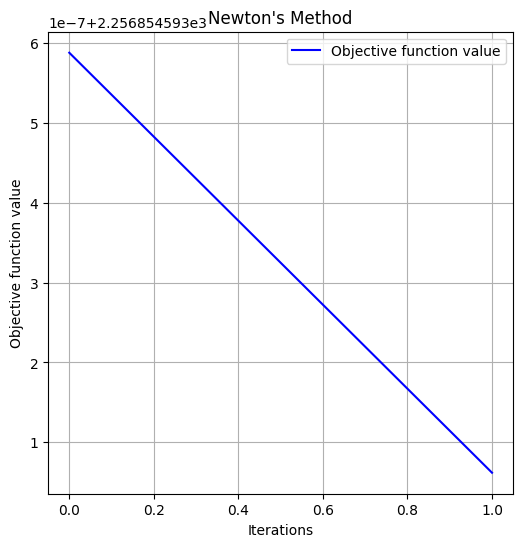

In [16]:
'Newton\'s Method for logistic regression'

def newton_method(X, y, initial_theta, max_iters, tolerance):
    theta = initial_theta
    objectives = []  # To store the objectives for each iteration
    step_count = 0  # Step counter

    for t in range(max_iters):
        # Calculate the gradient and Hessian
        grad = compute_logistic_gradient(X, theta, y)
        H = compute_hessian(X, theta, y)

        # Compute the inverse Hessian
        H_inv = np.linalg.inv(H)

        # Update theta using Newton's update rule
        theta = theta - H_inv.dot(grad)

        # Calculate the objective
        obj = calculate_logistic_objective(X, y, theta)
        objectives.append(obj)

        # Check for convergence
        if t > 0 and abs(objectives[-1] - objectives[-2]) < tolerance:
            break

        step_count += 1  # Increment the step counter

    return objectives, theta, step_count


# Hessian matrix for logistic regression
def compute_hessian(X, theta, y):
    z = X.dot(theta)
    pi = sigmoid(z)
    S = np.diag(pi * (1 - pi))  # Diagonal matrix with the variances
    H = X.T.dot(S).dot(X)  # Hessian matrix
    return H

# Start time measurement
start_time = time.time()

# Execute Newton's Method for logistic regression
objectives, final_theta, total_steps = newton_method(X, y, initial_theta, max_iters, tolerance)

# End time measurement
execution_time = time.time() - start_time

# Final results
print(f"Final theta: {final_theta}")
# print(f"Objectives: {objectives[-5:]}")  # Print the last 5 objective values for inspection
print(f"Total steps executed: {total_steps}")
print(f"Total execution time: {execution_time:.4f} seconds")  # Print execution time

# Plotting the objective function values
plt.figure(figsize=(6, 6))
plt.plot(objectives, label='Objective function value', color='blue')
plt.title('Newton\'s Method')
plt.xlabel('Iterations')
plt.ylabel('Objective function value')
plt.grid()
plt.legend()
plt.show()

Final theta: [-0.27664653  1.40893736  1.98727174  1.37718413  0.17595283  1.11095262
  1.30264844 -0.2353627 ]
Total steps executed: 18
Total execution time: 0.0288 seconds


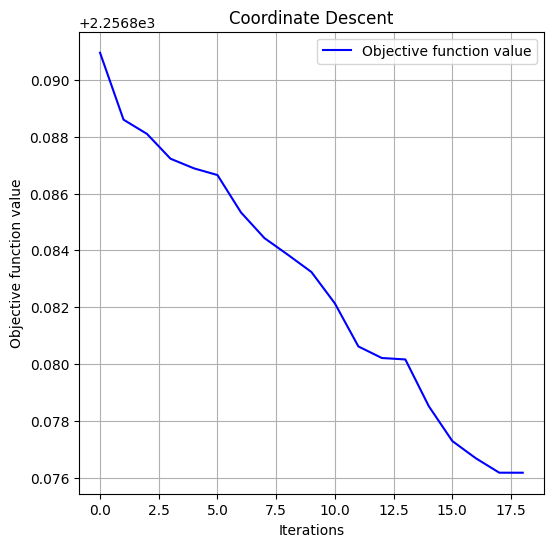

In [17]:
'Coordinate Descent implementation'

def coordinate_descent(X, y, initial_theta, max_iters, L, tolerance):
    theta = initial_theta.copy()
    objectives = []  # To store the objectives for each iteration
    step_count = 0  # Step counter

    for t in range(max_iters):
        i_t = np.random.randint(len(theta))  # Randomly select a coordinate

        # Compute the gradient at the selected coordinate
        grad = compute_logistic_gradient(X, theta, y)

        # Update the selected coordinate
        theta[i_t] -= (1 / L) * grad[i_t]  # Coordinate update

        # Calculate the objective
        obj = calculate_logistic_objective(X, y, theta)
        objectives.append(obj)

        # Check for convergence
        if t > 0 and abs(objectives[-1] - objectives[-2]) < tolerance:
            break

        step_count += 1  # Increment the step counter

    return objectives, theta, step_count

# Calculate the smoothness constant L
def compute_smoothness_constant(X):
    eigenvalues = np.linalg.eigvals(X.T.dot(X))
    L = np.max(eigenvalues) / 4  # L = 1/4 * maximum eigenvalue
    return L


# Compute L
L = compute_smoothness_constant(X)

# Measure execution time
start_time = time.time()  # Start timing

# Execute Coordinate Descent for logistic regression
objectives, final_theta, total_steps = coordinate_descent(X, y, initial_theta, max_iters, L, tolerance)

# Measure end time
execution_time = time.time() - start_time  # Total execution time

# Final results
print(f"Final theta: {final_theta}")
# print(f"Objectives: {objectives[-5:]}")  # Print the last 5 objective values for inspection
print(f"Total steps executed: {total_steps}")
print(f"Total execution time: {execution_time:.4f} seconds")  # Print execution time

# Plotting the objective function values
plt.figure(figsize=(6, 6))
plt.plot(objectives, label='Objective function value', color='blue')
plt.title('Coordinate Descent')
plt.xlabel('Iterations')
plt.ylabel('Objective function value')
plt.grid()
plt.legend()
plt.show()